# TRISEP ML tutorial part II: Building your first fully connected network and a CNN 

## Building a simple fully connected network (a Multi-Layer Perceptron)

Let's set up the paths and make a dataset again:

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.data_handling import WCH5Dataset

In [3]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1)

Now Let's make our model. We'll talk about 
  - model parameters
  - inputs and the forward method
  - Modules containing modules
  - Sequential Module  
  Lets open [simpleMLP](/edit/models/simpleMLP.py)

In [4]:
from models.simpleMLP import SimpleMLP

In [5]:
model_MLP=SimpleMLP(num_classes=3)

Let's look at the parameters:

In [6]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: fc1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc5.weight, type: <class 'torch.nn.parameter.Parameter'>, p

As we can see by default the parameters have `requires_grad` set - i.e. we will be able to obtain gradient of the loss function with respect to these parameters.

Let's quickly look at the [source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for the linear module

The parameters descend from the `Tensor` class. When `Parameter` object is instantiated as a member of a `Module` object class the parameter is added to `Module`s list of parameters automatically. This list and values are captured in the 'state dictionary' of a module:

In [7]:
model_MLP.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0045, -0.0028, -0.0042,  ..., -0.0001,  0.0029,  0.0023],
                      [-0.0060, -0.0043,  0.0039,  ..., -0.0053,  0.0027, -0.0046],
                      [-0.0043,  0.0021, -0.0019,  ..., -0.0028, -0.0027,  0.0033],
                      ...,
                      [-0.0048, -0.0062,  0.0055,  ...,  0.0046,  0.0015,  0.0060],
                      [-0.0040,  0.0017,  0.0054,  ..., -0.0012, -0.0063,  0.0059],
                      [-0.0019,  0.0034,  0.0025,  ...,  0.0037, -0.0017, -0.0051]])),
             ('fc1.bias',
              tensor([-0.0029, -0.0010,  0.0053,  ...,  0.0033, -0.0028,  0.0009])),
             ('fc2.weight',
              tensor([[ 0.0029, -0.0056,  0.0061,  ...,  0.0054,  0.0079, -0.0072],
                      [-0.0007,  0.0011, -0.0098,  ...,  0.0005,  0.0043, -0.0068],
                      [ 0.0085, -0.0048,  0.0077,  ...,  0.0064,  0.0007,  0.0038],
                      ...,
                    

Now let's look at sequential version

In [8]:
from models.simpleMLP import SimpleMLPSEQ
model_MLPSEQ=SimpleMLPSEQ(num_classes=3)

In [9]:
for name, param in model_MLPSEQ.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: _sequence.0.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.0.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parame

In [10]:
print(model_MLPSEQ.state_dict())

OrderedDict([('_sequence.0.weight', tensor([[ 0.0023, -0.0034, -0.0022,  ...,  0.0017, -0.0019, -0.0054],
        [-0.0053,  0.0005, -0.0049,  ...,  0.0051,  0.0059,  0.0026],
        [ 0.0051, -0.0057,  0.0041,  ...,  0.0014, -0.0035,  0.0024],
        ...,
        [ 0.0052,  0.0059,  0.0046,  ..., -0.0018,  0.0052, -0.0015],
        [-0.0034, -0.0053,  0.0006,  ...,  0.0046, -0.0061, -0.0009],
        [ 0.0050,  0.0053,  0.0013,  ...,  0.0010,  0.0037,  0.0002]])), ('_sequence.0.bias', tensor([ 0.0043,  0.0025,  0.0041,  ...,  0.0060,  0.0028, -0.0049])), ('_sequence.2.weight', tensor([[ 5.8564e-03,  8.0929e-03,  6.1688e-03,  ..., -9.0157e-03,
          4.3661e-03,  1.2096e-03],
        [-4.6539e-03, -4.8307e-03, -1.0075e-03,  ...,  5.6614e-03,
         -7.6278e-03,  6.7274e-03],
        [ 2.1658e-05, -2.2790e-03,  3.9024e-03,  ..., -5.7596e-03,
          6.8003e-03, -6.8300e-03],
        ...,
        [-1.0003e-02, -1.4065e-03,  7.2065e-04,  ...,  1.3054e-03,
          5.1605e-03,  3

As we can see the parameters look similar but have different names

## Training a model

First let's make a dataset object

In [11]:
import numpy as np
transform=np.ravel
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=50000,val_split=0.1,test_split=0.1,transform=transform)

Reduced size: 50000


Let's make a dataloader and grab a first batch

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

train_dldr=DataLoader(dset,
                      batch_size=32,
                      shuffle=False,
                      sampler=SubsetRandomSampler(dset.train_indices))
train_iter=iter(train_dldr)

In [13]:
batch0=next(train_iter)

In [14]:
data=batch0[0]
labels=batch0[1]

Now compute the model output on the data

In [15]:
model_out=model_MLP(data)

Now we have model's predictions and we above got 'true' labels from the dataset, so we can now compute the loss - CrossEntropyLoss is the apropropriate one to use here. We will use `CrossEntropyLoss` from `torch.nn` - btw it is also a `Module`. First create it:

In [16]:
from torch.nn import CrossEntropyLoss
loss_module=CrossEntropyLoss()

Now evaluate the loss. 

In [17]:
loss_tensor=loss_module(model_out,labels)

This was a 'forward pass'. We should now have a computational graph available - let's plot it for the kicks...

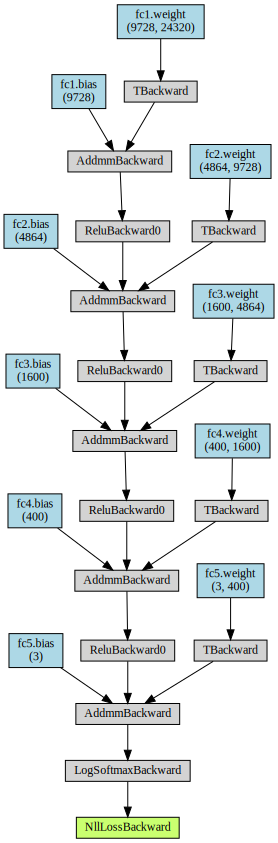

In [18]:
from torchviz import make_dot
make_dot(loss_tensor,params=dict(model_MLP.named_parameters()))

Before we calculate the gradients - let's check what they are now...

In [19]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: None
name of a parameter: fc1.bias, gradient: None
name of a parameter: fc2.weight, gradient: None
name of a parameter: fc2.bias, gradient: None
name of a parameter: fc3.weight, gradient: None
name of a parameter: fc3.bias, gradient: None
name of a parameter: fc4.weight, gradient: None
name of a parameter: fc4.bias, gradient: None
name of a parameter: fc5.weight, gradient: None
name of a parameter: fc5.bias, gradient: None


No wonder - let's calculate them

In [20]:
loss_tensor.backward()

In [21]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: tensor([[-3.6876e-06,  6.3797e-06,  0.0000e+00,  ...,  0.0000e+00,
          2.3630e-02,  4.0645e-03],
        [-3.0252e-05,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          1.9311e-03,  2.7006e-02],
        [-1.4752e-06,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          1.5044e-02,  3.7976e-02],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         -1.6996e-02, -1.7023e-02],
        [-7.3983e-07,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00, -2.0938e-02],
        [ 4.5751e-06,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  1.1034e-02]])
name of a parameter: fc1.bias, gradient: tensor([ 1.1356e-05, -3.5885e-05,  6.1519e-05,  ..., -2.0004e-05,
        -2.5737e-05,  1.3268e-06])
name of a parameter: fc2.weight, gradient: tensor([[ 0.0000e+00,  1.7807e-03,  2.4970e-03,  ...,  2.3788e-03,
          3.6255e-04,  1.9051e-03],
        [ 1.5994e-02,  9.4621e-03,  1

All we have to do now is subtract the gradient of a given parameter from the parameter tensor itself and do it for all parameters of the model - that should decrease the loss. Normally the gradient is multiplied by a learning rate parameter $\lambda$ so we don't go too far in the loss landscape

In [22]:
lr=0.0001
for param in model_MLP.parameters():
    param.data.add_(-lr*param.grad.data)

call to backward **accumulates** gradients - so we also need to zero the gradient tensors if we want to keep going

In [23]:
for param in model_MLP.parameters():
    param.grad.data.zero_()

There is a much simpler way of doing this - we can use the pytorch [optim](https://pytorch.org/docs/stable/optim.html) classes. This allows us to easily use more advanced optimization options (like momentum or adaptive optimizers like [Adam](https://arxiv.org/abs/1412.6980)):

In [24]:
from torch import optim
optimizer = optim.SGD(model_MLP.parameters(), lr=0.0001)

Lets get a new batch of events

In [25]:
batch1=next(train_iter)

In [26]:
data=batch0[0]
labels=batch0[1]

In [27]:
model_out=model_MLP(data)
loss_tensor=loss_module(model_out,labels)
loss_tensor.backward()
optimizer.step()

We could just put the code above in a loop and be done with it, but the usual practice would be to wrap this functionality in a training object. Here we'll use the [engine](/edit/utils/engine.py) class. Let's examine it. We'll talk about:
  1. Implementation of the training loop
  2. Evaluation on validation set and training and test modes.
  3. Turning evaluation of gradients on and off.
  4. Saving and retrieving the model and optimizer state.

In [28]:
from utils.engine import Engine

Let's first create a configuration object -we'll use this to set up our training engine

In [29]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 2048
config.lr=0.001
config.device = 'gpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'


In [30]:
engine=Engine(model_MLP,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190731_110950/


In [31]:
print(vars(config))

{'batch_size_test': 1024, 'batch_size_train': 32, 'batch_size_val': 2048, 'lr': 0.001, 'device': 'gpu', 'num_workers_train': 3, 'num_workers_val': 2, 'num_workers_test': 2, 'dump_path': '../model_state_dumps'}


In [ ]:
%%time
engine.train(epochs=2.5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-07-31 11:09:50
... Iteration 0 ... Epoch 0.00 ... Validation Loss 3.564 ... Validation Accuracy 0.359
Saved checkpoint as: ../model_state_dumps/20190731_110950/SimpleMLP.pth
best validation loss so far!: 3.5640761852264404
Saved checkpoint as: ../model_state_dumps/20190731_110950/SimpleMLPBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 3.322 ... Accuracy 0.344
... Iteration 11 ... Epoch 0.01 ... Loss 1.169 ... Accuracy 0.406
... Iteration 21 ... Epoch 0.02 ... Loss 1.043 ... Accuracy 0.406
... Iteration 31 ... Epoch 0.02 ... Loss 0.985 ... Accuracy 0.656
... Iteration 41 ... Epoch 0.03 ... Loss 0.913 ... Accuracy 0.531
... Iteration 51 ... Epoch 0.04 ... Loss 0.886 ... Accuracy 0.562
... Iteration 61 ... Epoch 0.05 ... Loss 1.015 ... Accuracy 0.469
... Iteration 71 ... Epoch 0.06 ... Loss 0.803 ... Accuracy 0.594
... Iteration 81 ... Epoch 0.06 ... Loss 0.888 ... Accuracy 0.469
... Iteration 91 ... Epoch 0.07 ... Loss 1.024 ... Accuracy 0.469
... Iteration 100 

... Iteration 851 ... Epoch 0.68 ... Loss 0.488 ... Accuracy 0.688
... Iteration 861 ... Epoch 0.69 ... Loss 0.571 ... Accuracy 0.719
... Iteration 871 ... Epoch 0.70 ... Loss 0.459 ... Accuracy 0.688
... Iteration 881 ... Epoch 0.70 ... Loss 0.482 ... Accuracy 0.719
... Iteration 891 ... Epoch 0.71 ... Loss 0.357 ... Accuracy 0.875
starting over on the validation set
... Iteration 900 ... Epoch 0.72 ... Validation Loss 0.485 ... Validation Accuracy 0.705
Saved checkpoint as: ../model_state_dumps/20190731_110950/SimpleMLP.pth
... Iteration 901 ... Epoch 0.72 ... Loss 0.667 ... Accuracy 0.656
... Iteration 911 ... Epoch 0.73 ... Loss 0.362 ... Accuracy 0.875
... Iteration 921 ... Epoch 0.74 ... Loss 0.371 ... Accuracy 0.781
... Iteration 931 ... Epoch 0.74 ... Loss 0.439 ... Accuracy 0.719
... Iteration 941 ... Epoch 0.75 ... Loss 0.326 ... Accuracy 0.844
... Iteration 951 ... Epoch 0.76 ... Loss 0.491 ... Accuracy 0.719
... Iteration 961 ... Epoch 0.77 ... Loss 0.625 ... Accuracy 0.562

Is the model training?

## Defining a simple Convolutional Network

In [ ]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [ ]:
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [ ]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [ ]:
engine=Engine(model_CNN,dset,config)

In [ ]:
for name, param in model_CNN.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

In [ ]:
%%time
engine.train(epochs=5,report_interval=10,valid_interval=100)